In [102]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as clr
import pandas as pd
import numpy as np
import os
import csv

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "/Users/anirbanmukherjee/Documents/UNC Homeworks/HW_10192019/mouse_drug_data.csv"
clinical_trial_data_to_load = "/Users/anirbanmukherjee/Documents/UNC Homeworks/HW_10192019/clinicaltrial_data.csv"


#c_l_d_load.head()

# Read the Mouse and Drug Data and the Clinical Trial Data
cld_load = pd.read_csv(clinical_trial_data_to_load)
mdd_load = pd.read_csv(mouse_drug_data_to_load)
cld_load = cld_load.rename(columns = {"Tumor Volume (mm3)":"TumorVolume"})


# Combine the data into a single dataset

total_load = pd.merge(cld_load, mdd_load, how="left", on=["Mouse ID", "Mouse ID"])
#total_load_name = total_load["Drug"].unique()    

# Display the data table for preview
total_load.head()
#total_load_name

,Mouse ID,Timepoint,TumorVolume,Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [94]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint
group_mean_load = total_load.groupby(["Drug","Timepoint"]).mean()["TumorVolume"]

# Convert to DataFrame

df_group_mean_load = pd.DataFrame(group_mean_load)
#mean_group_d_load = pd.DataFrame(group_d_load).mean()

df_group_mean_load
# Preview DataFrame
#df_group_d_load.head()

#group_d_load1 = total_load.groupby(["Drug"]).mean()["TumorVolume"]
#df_group_d_load1 = pd.DataFrame(group_d_load1)
#df_group_d_load1.head()

In [95]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
group_se_load = total_load.groupby(["Drug","Timepoint"]).sem()["TumorVolume"]



# Convert to DataFrame

df_group_se_load = pd.DataFrame(group_se_load)

# Preview DataFrame
#df_group_se_load


In [96]:
# Minor Data Munging to Re-Format the Data Frames
#school_typ = school_data.set_index('school_name')["type"]


#df_format1 = df_group_mean_load.set_index("Drug")
df_group_mean_load_r = df_group_mean_load.reset_index()
df_group_mean_load_tr = df_group_mean_load_r.pivot(index = 'Timepoint', columns = 'Drug')['TumorVolume']

#df_group_mean_load_tr = df_group_mean_load.transpose()

df_group_se_load_r = df_group_se_load.reset_index()
df_group_se_load_tr = df_group_se_load_r.pivot(index ='Timepoint', columns = 'Drug')['TumorVolume']



# Preview that Reformatting worked
#df_group_mean_load_tr.head()

#df_group_se_load_tr.head()
#df_group_mean_load_tr.index


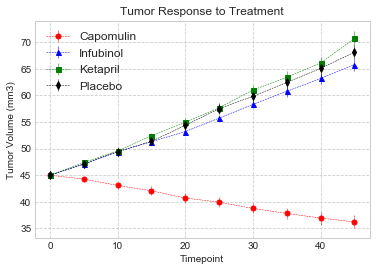

In [107]:
# Generate the Plot (with Error Bars)

total_load_name = total_load["Drug"].unique() 
x_axis = df_group_mean_load_tr.index

i = 1

#clr.Colormap("red", 1)

plt.figure(figsize=(6,4))

# for name in total_load_name: 
#   #  color=clr.rainbow(np.linspace(0,1,i))
#     plt.errorbar(x_axis, df_group_mean_load_tr[name], yerr=df_group_se_load_tr[name],\
#              marker="o", markersize=5, linestyle="dashed", linewidth=0.50)
    #plt.show()
    
plt.errorbar(x_axis, df_group_mean_load_tr["Capomulin"], yerr=df_group_se_load_tr["Capomulin"],\
              color ="r",marker="o", markersize=5, linestyle="dashed", linewidth=0.50, label = "Capomulin")
plt.errorbar(x_axis, df_group_mean_load_tr["Infubinol"], yerr=df_group_se_load_tr["Infubinol"],\
              color ="b",marker="^", markersize=5, linestyle="dashed", linewidth=0.50, label = "Infubinol")
plt.errorbar(x_axis, df_group_mean_load_tr["Ketapril"], yerr=df_group_se_load_tr["Ketapril"],\
              color ="g",marker="s", markersize=5, linestyle="dashed", linewidth=0.50, label = "Ketapril")
plt.errorbar(x_axis, df_group_mean_load_tr["Placebo"], yerr=df_group_se_load_tr["Placebo"],\
              color ="k",marker="d", markersize=5, linestyle="dashed", linewidth=0.50, label = "Placebo")
    

plt.title("Tumor Response to Treatment")
plt.xlabel("Timepoint") 
plt.ylabel("Tumor Volume (mm3)")
plt.style.use('seaborn-whitegrid')
plt.grid(linestyle="dashed")
plt.legend(loc='best', fontsize=12, fancybox=True)

plt.show()


# Save the Figure



In [105]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [82]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

group_mean_load_mt = total_load.groupby(["Drug","Timepoint"]).mean()["Metastatic Sites"]

# Convert to DataFrame

df_group_mean_load_mt = pd.DataFrame(group_mean_load_mt)
#mean_group_d_load = pd.DataFrame(group_d_load).mean()

#df_group_mean_load_mt


# Convert to DataFrame

# Preview DataFrame


In [83]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

group_se_load_mt = total_load.groupby(["Drug","Timepoint"]).sem()["Metastatic Sites"]



# Convert to DataFrame

df_group_se_load_mt = pd.DataFrame(group_se_load_mt)

df_group_se_load_mt.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [86]:
# Minor Data Munging to Re-Format the Data Frames
df_group_mean_load_r_mt = df_group_mean_load_mt.reset_index()
df_group_mean_load_tr_mt = df_group_mean_load_r_mt.pivot(index = 'Timepoint', columns = 'Drug')['Metastatic Sites']

#df_group_mean_load_tr = df_group_mean_load.transpose()

df_group_se_load_r_mt = df_group_se_load_mt.reset_index()
df_group_se_load_tr_mt = df_group_se_load_r_mt.pivot(index ='Timepoint', columns = 'Drug')['Metastatic Sites']


df_group_se_load_tr_mt.head()


# Preview that Reformatting worked


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


In [ ]:
# Generate the Plot (with Error Bars)

# Generate the Plot (with Error Bars)


# Save the Figure

# Show the Figure


![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [92]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

group_count_load_m = total_load.groupby(["Drug","Timepoint"]).count()["Mouse ID"]

# Convert to DataFrame

df_group_count_load_m = pd.DataFrame(group_count_load_m)
#mean_group_d_load = pd.DataFrame(group_d_load).mean()

#df_group_count_load_m



# Convert to DataFrame

# Preview DataFrame


In [93]:
# Minor Data Munging to Re-Format the Data Frames

df_group_count_load_rt_m = df_group_count_load_m.reset_index()
df_group_count_load_tr_m = df_group_count_load_rt_m.pivot(index = 'Timepoint', columns = 'Drug')['Mouse ID']

df_group_count_load_tr_m.head()


# Preview the Data Frame


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [ ]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)